<font size=2;>
<p style="text-align: right;">
Lab Solution
</p>
</font>

# Classification by Support Vector Machine

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Choice of Kernel

### Dataset & New Observations

Here is a dataset of 6 classified observations and a new dataset of 2 unclassified observations for use in the problems 1, 2, and 3.

x1,class
2.3,A
2.5,A
4.0,A
6.5,B
8.5,B
9.1,A


x1
6.1
6.4


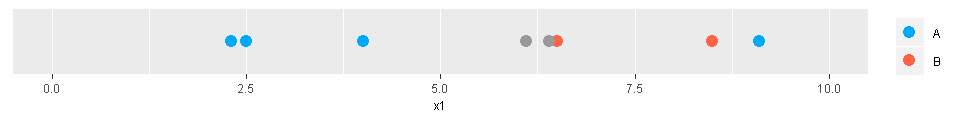

In [2]:
data = data.frame(x1=c(2.3, 2.5, 4.0, 6.5, 8.5, 9.1), class=c("A", "A", "A", "B",  "B", "A"))
new  = data.frame(x1=c(6.1, 6.4))
data
new

output_size(8, 1)
ggplot(data) + xlim(0,10) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=new, color=NEW_COLOR) +
theme.x_axis_only
output_size(restore)

### Problem 1

Add a synthetic variable `y` to the classified and unclassified datasets, calculated as the radial basis (Gaussian) of variable `x1`.  Set radial_center=7.7, gamma=0.5.  Note that the 3-variable classified dataset is linearly separable.  Show the classified 3-variable dataset as a 2-dimensional scatterplot, color-coded by class.  On the same scatterplot, show the support vectors (circled in black), boundary (dashed line), and margin edges (solid lines), as would be calculated by a support vector machine.  On the same scatterplot, show the unclassified 2-variable dataset, color-coded by predicted class (circled in gold), assuming cutoff 0.50.  Then show the original classified and unclassified datasets as a 1-dimensional scatterplot, color-coded by class or predicted class (circled in gold), and circle teh support vectors. 

The radial basis of one variable `x` is defined as `exp(-gamma*(x-radial_center)^2)`.

You may want to use these function(s):
* gaussian()
* svm_margin()
* stat_function()
* geom_point()
* geom_abline()

Use `fmt(..., row.names=TRUE)` to output a table with row numbers.<br>
Use `gaussian(..., ..., ...)` to calculate the result of the gaussian function, where the 1st argument is a vector of values, the 2nd argument is the mean (radial center), and the 3rd argument is the standard deviation ($\sqrt{\frac{1}{2gamma}}$).<br>
Use `stat_function(fun=gaussian, args=c(radial_center, standard_deviation), geom="area", alpha=0.3)` to plot a gaussian function.<br>
Use `svm_margin(..., ...)` to get the intercepts and slope of margin edges and boundary, where the 1st argument is a table of support vector(s) that touch one edge of the margin, and the 2nd argument is a table of support vector(s) that touch the other edge of the margin.

In [3]:
radial_center = 7.7
gamma = 0.5
stdev = sqrt(1/(2*gamma))

data$y = gaussian(data$x1, radial_center, stdev)
data = data[, c("x1","y","class")]
new$y  = gaussian(new$x1, radial_center, stdev)

fmt(data, row.names=TRUE)
new

,x1,y,class
1,2.3,0.0000002,A
2,2.5,0.0000005,A
3,4.0,0.0004248,A
4,6.5,0.1941861,B
5,8.5,0.2896916,B
6,9.1,0.1497275,A


x1,y
6.1,0.1109208
6.4,0.1713686


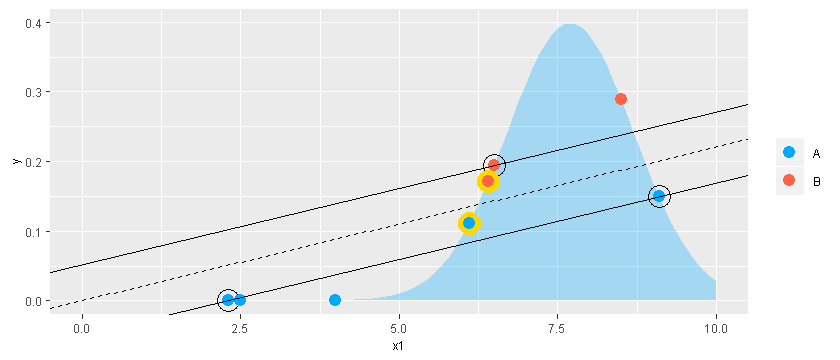

In [4]:
# These are the support vector(s) that touch the edges of the margin
edge.1 = data[c(1,6),]
edge.2 = data[4,]

# These are the lines (intercepts and slopes) for margin edges and boundary
line = svm_margin(edge.1, edge.2)

# These are the new observations' predicted classes, assuming cutoff=0.5
new$class.predicted = c("A","B")

ggplot(data) + xlim(0,10) +
stat_function(fun=gaussian, args=c(radial_center, stdev), geom="area", alpha=0.3) +
geom_point(aes(x=x1, y=y), data=edge.1, shape=1, size=6, color="black") +
geom_point(aes(x=x1, y=y), data=edge.2, shape=1, size=6, color="black") +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=y, color=class.predicted), data=new) +
geom_abline(aes(intercept=line$i1, slope=line$m)) +
geom_abline(aes(intercept=line$i2, slope=line$m), linetype="dashed") +
geom_abline(aes(intercept=line$i3, slope=line$m))

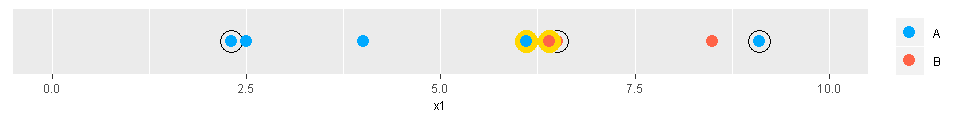

In [5]:
output_size(8, 1)
ggplot(data) + xlim(0,10) +
geom_point(aes(x=x1, y=0), data=edge.1, shape=1, size=6, color="black") +
geom_point(aes(x=x1, y=0), data=edge.2, shape=1, size=6, color="black") +
geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=new, color="gold", size=6) +
geom_point(aes(x=x1, y=0, color=class.predicted), data=new) +
theme.x_axis_only
output_size(restore)

### Problem 2

Repeat the analysis done in problem 1, except set radial_center=6, gamma=0.1.  

,x1,y,class
1,2.3,0.0453812,A
2,2.5,0.0524100,A
3,4.0,0.1195934,A
4,6.5,0.1740074,B
5,8.5,0.0954973,B
6,9.1,0.0682446,A


x1,y
6.1,0.1782341
6.4,0.1755805


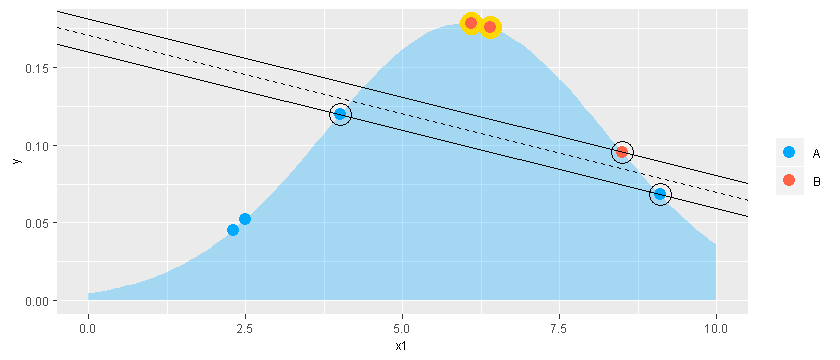

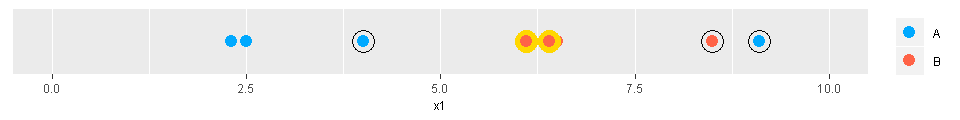

### Problem 3

Repeat the analysis done in problem 1, except calculate y as the polynomial (x1-6)^2.

x1,y,class
2.3,13.69,A
2.5,12.25,A
4.0,4.00,A
6.5,0.25,B
8.5,6.25,B
9.1,9.61,A


x1,y
6.1,0.01
6.4,0.16


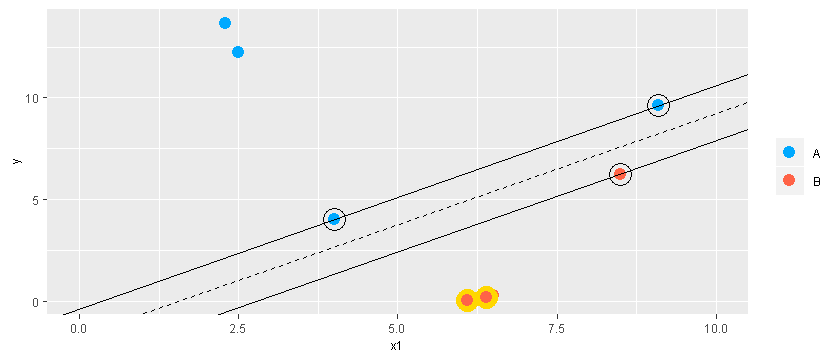

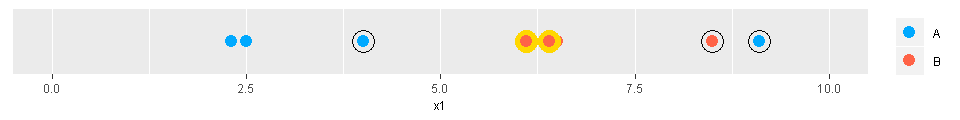

## Choice of Cost

### Dataset

Here is a dataset of 6 classified observations for use in the problems 4 and 5.

In [12]:
data = data.frame(x1=c(2.3, 2.5, 4.0, 6.5, 8.5, 9.1), class=c("A", "A", "A", "B",  "B", "A"))
data

x1,class
2.3,A
2.5,A
4.0,A
6.5,B
8.5,B
9.1,A


### Problem 4

Construct an SVM model trained on the classified dataset with these hyper-parameter settings:<br>
`type="C-classification"`, `kernel="radial"`, `gamma=1`, `scale=TRUE`, `cost=1`.  

Determine the model's in-sample class probabilities, predicted classes (cutoff=0.5 for class A), confusion matrix, true positive rate (positive is class A), and accuracy. 

You may want to use these function(s):
* set.seed()
* svm()
* attr()
* predict()
* confusionMatrix()

Use `set.seed(0)` and `svm(...)` together to ensure consistency in the class probabilities.
Use `svm(class~x1, ..., probability=TRUE)` to ensure class probabilities are calculated.
Use `attr(predict(..., ..., probability=TRUE), "probabilities")` to get the calculated class probabilities.

A,B
0.4657822,0.5342178
0.4580600,0.5419400
0.5052255,0.4947745
0.8169062,0.1830938
0.7965387,0.2034613
0.7508560,0.2491440


x1,class,class.predicted
2.3,A,B
2.5,A,B
4.0,A,A
6.5,B,A
8.5,B,A
9.1,A,A


,A,B
A,0.3333333,0.3333333
B,0.3333333,0.0000000


kernel,gamma,scale,cost,tpr,accuracy
radial,1,TRUE,1,0.5,0.3333333


### Problem 5

Repeat the analyis done in problem 4, except instead try cost 0.01, 0.1, 1, 10, and 100 (use set.seed(0) for each try).  Record the true positive rate and accuracy of each model in a table.

model,kernel,gamma,scale,cost,tpr,accuracy
1,radial,1,TRUE,0.01,1.00,0.6666667
2,radial,1,TRUE,0.10,0.25,0.1666667
3,radial,1,TRUE,1.00,0.50,0.3333333
4,radial,1,TRUE,10.00,1.00,0.8333333
5,radial,1,TRUE,100.00,1.00,0.8333333


<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised March 17, 2020
</span>
</p>
</font>